In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
plt.rc("font",size=14)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes= True)
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm 
import math 
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [3]:
fdf = pd.read_csv(r'Fairfield.csv')
df = pd.read_csv(r'Fairfield_loc.csv')
fdf.head()

,Reservoir,Fish,Mercury,Elevation,Drainage Area,Surface Area,Max Depth,RF,FR,Dam,RT,RS
0,Abilene,3,0.053,196,6.0,74,36.0,0.44,1.1,1.0,2.0,0.0
1,Abraham Lake,4,0.350,345,15.0,360,80.0,0.51,1.7,0.0,3.0,1.0
2,Academy,5,0.540,487,1.0,175,10.0,0.57,1.5,0.0,3.0,0.0
3,Acadia,5,0.290,165,131.0,5543,100.0,0.51,1.1,0.0,2.0,1.0
4,Acadia Valley,5,0.910,1273,65.0,700,106.0,0.62,4.3,0.0,1.0,1.0


In [4]:
fdf['Fish'] = pd.to_numeric(fdf['Fish'], errors='coerce').fillna(0).astype(int)
fdf['Elevation'] = pd.to_numeric(fdf['Elevation'], errors='coerce').fillna(0).astype(int)

fdf['Mercury'] = pd.to_numeric(fdf['Mercury'], errors='coerce').fillna(0).astype(int)

fdf['Drainage Area'] = pd.to_numeric(fdf['Drainage Area'], errors='coerce').fillna(0).astype(int)
fdf['Surface Area'] = pd.to_numeric(fdf['Surface Area'], errors='coerce').fillna(0).astype(int)
fdf['Dam'] = pd.to_numeric(fdf['Dam'], errors='coerce').fillna(0).astype(int)

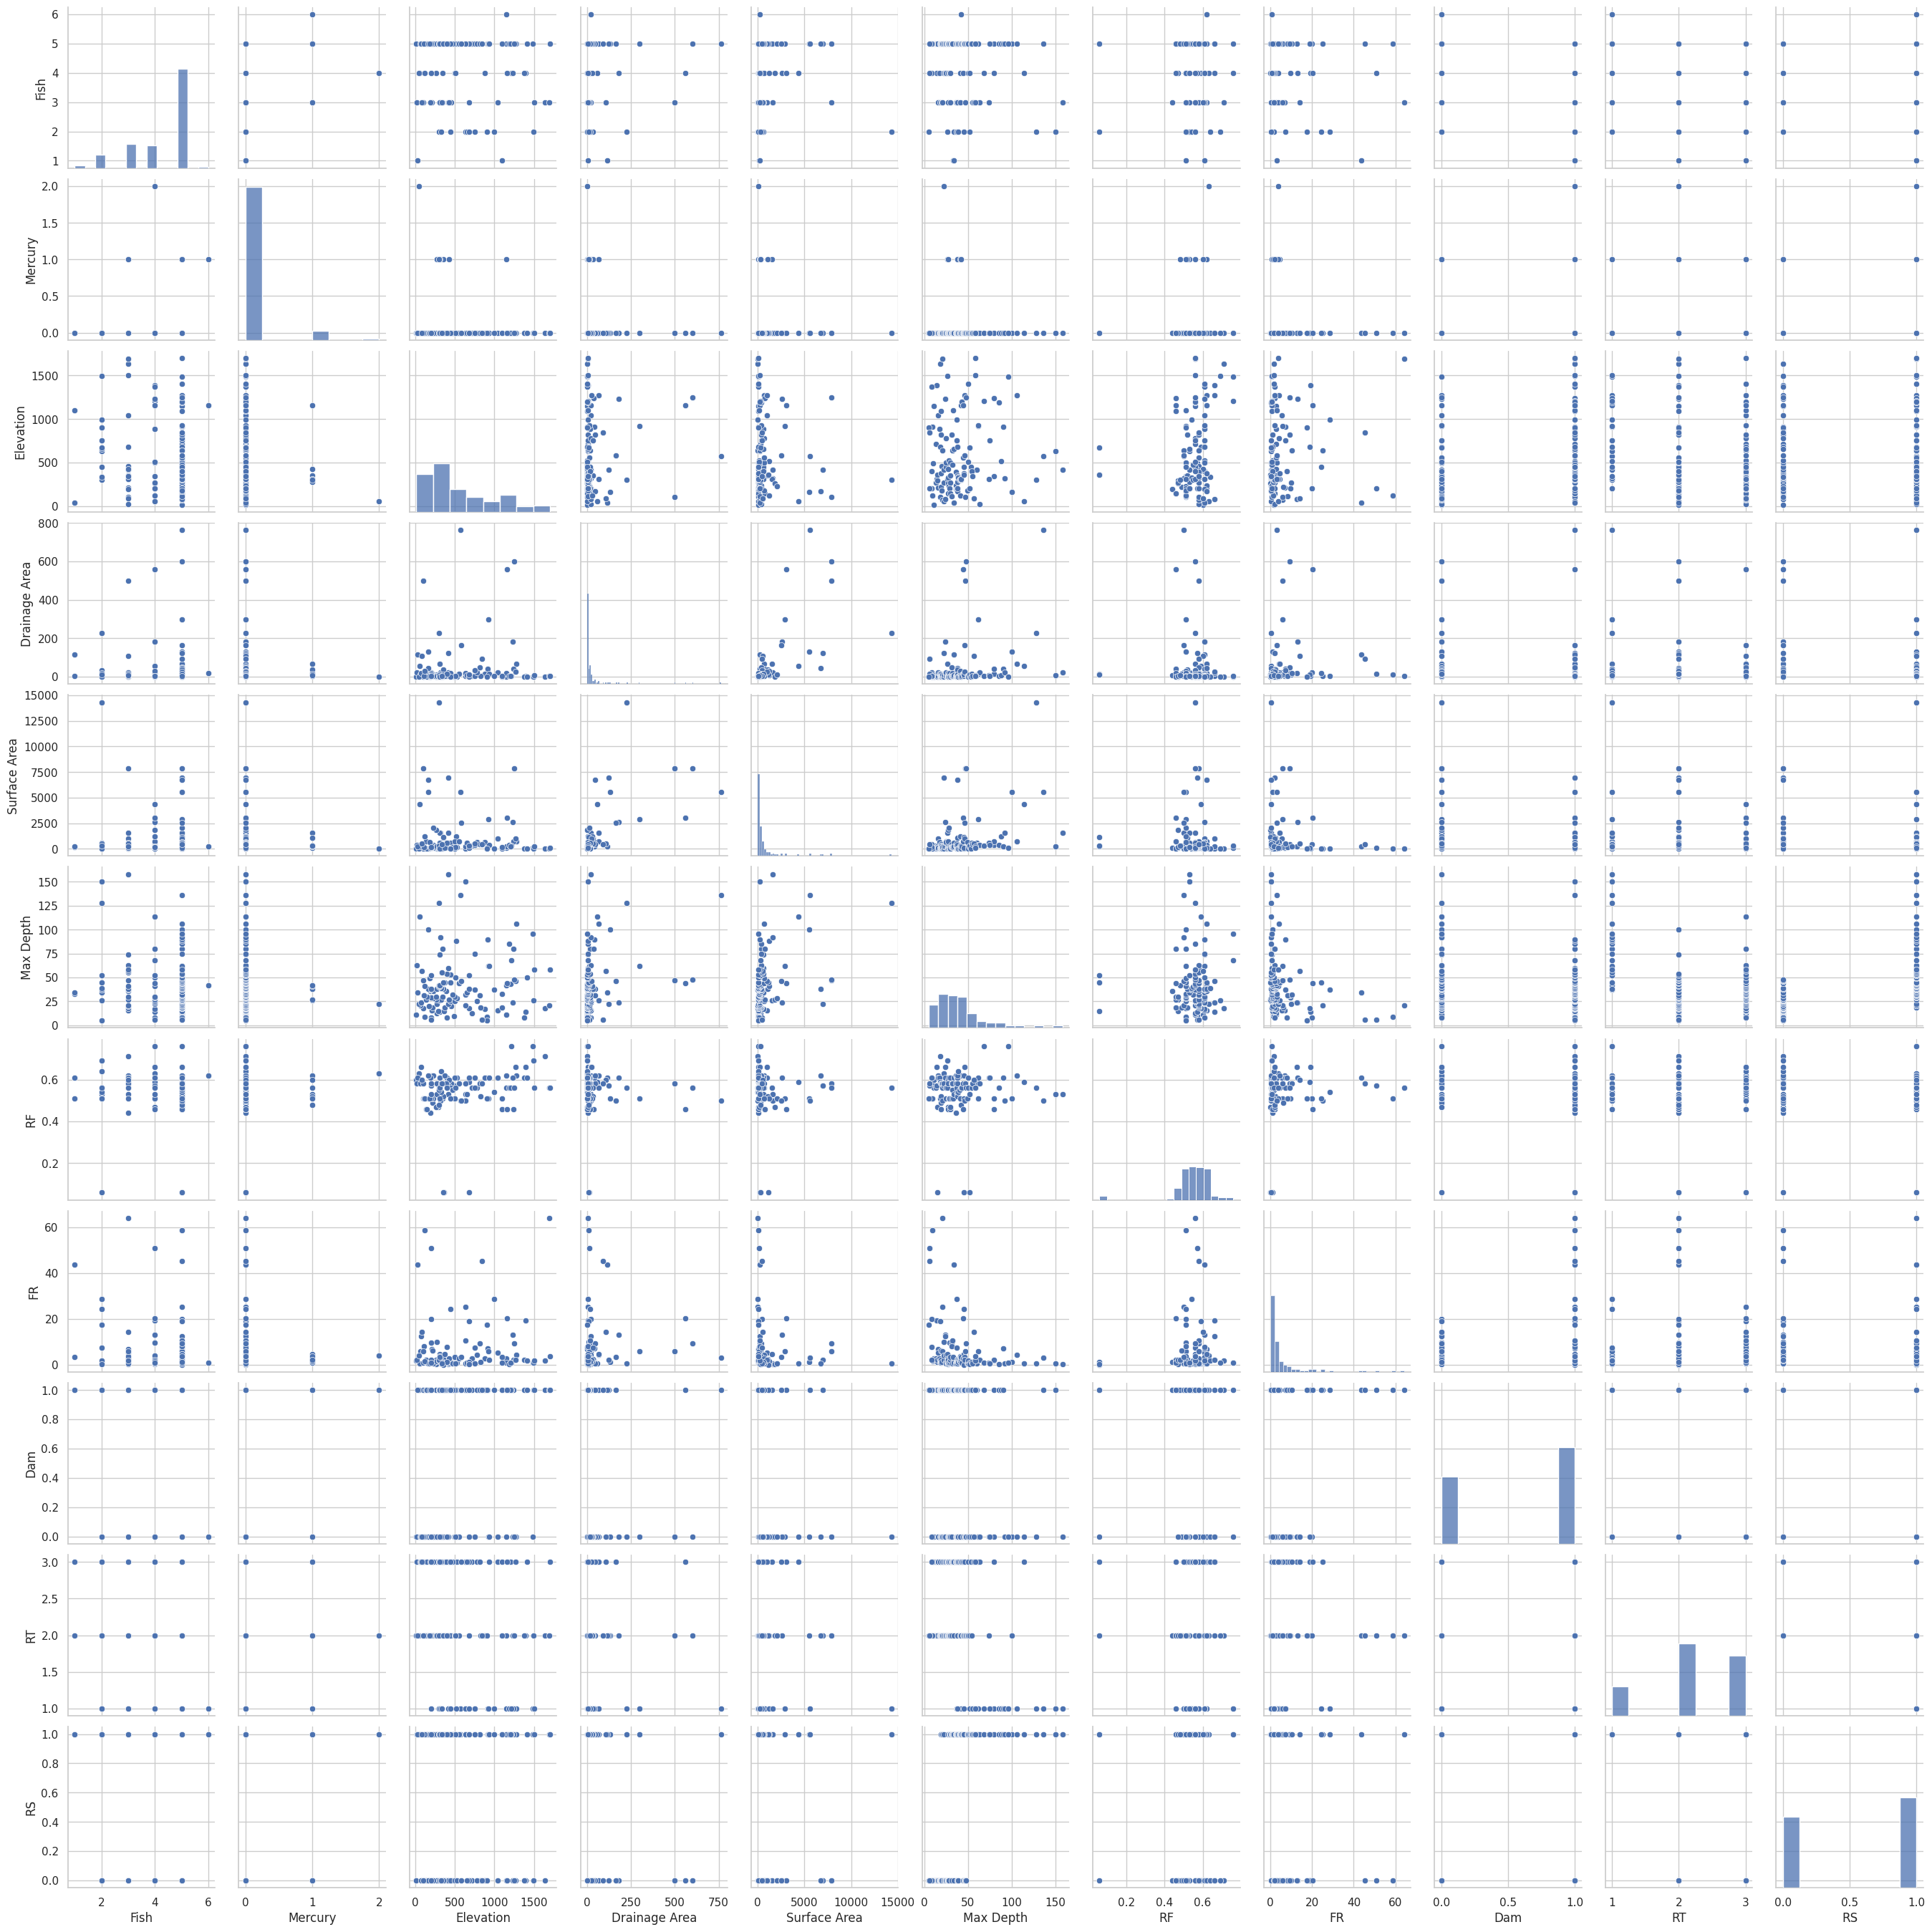

In [5]:
sns.pairplot(fdf)

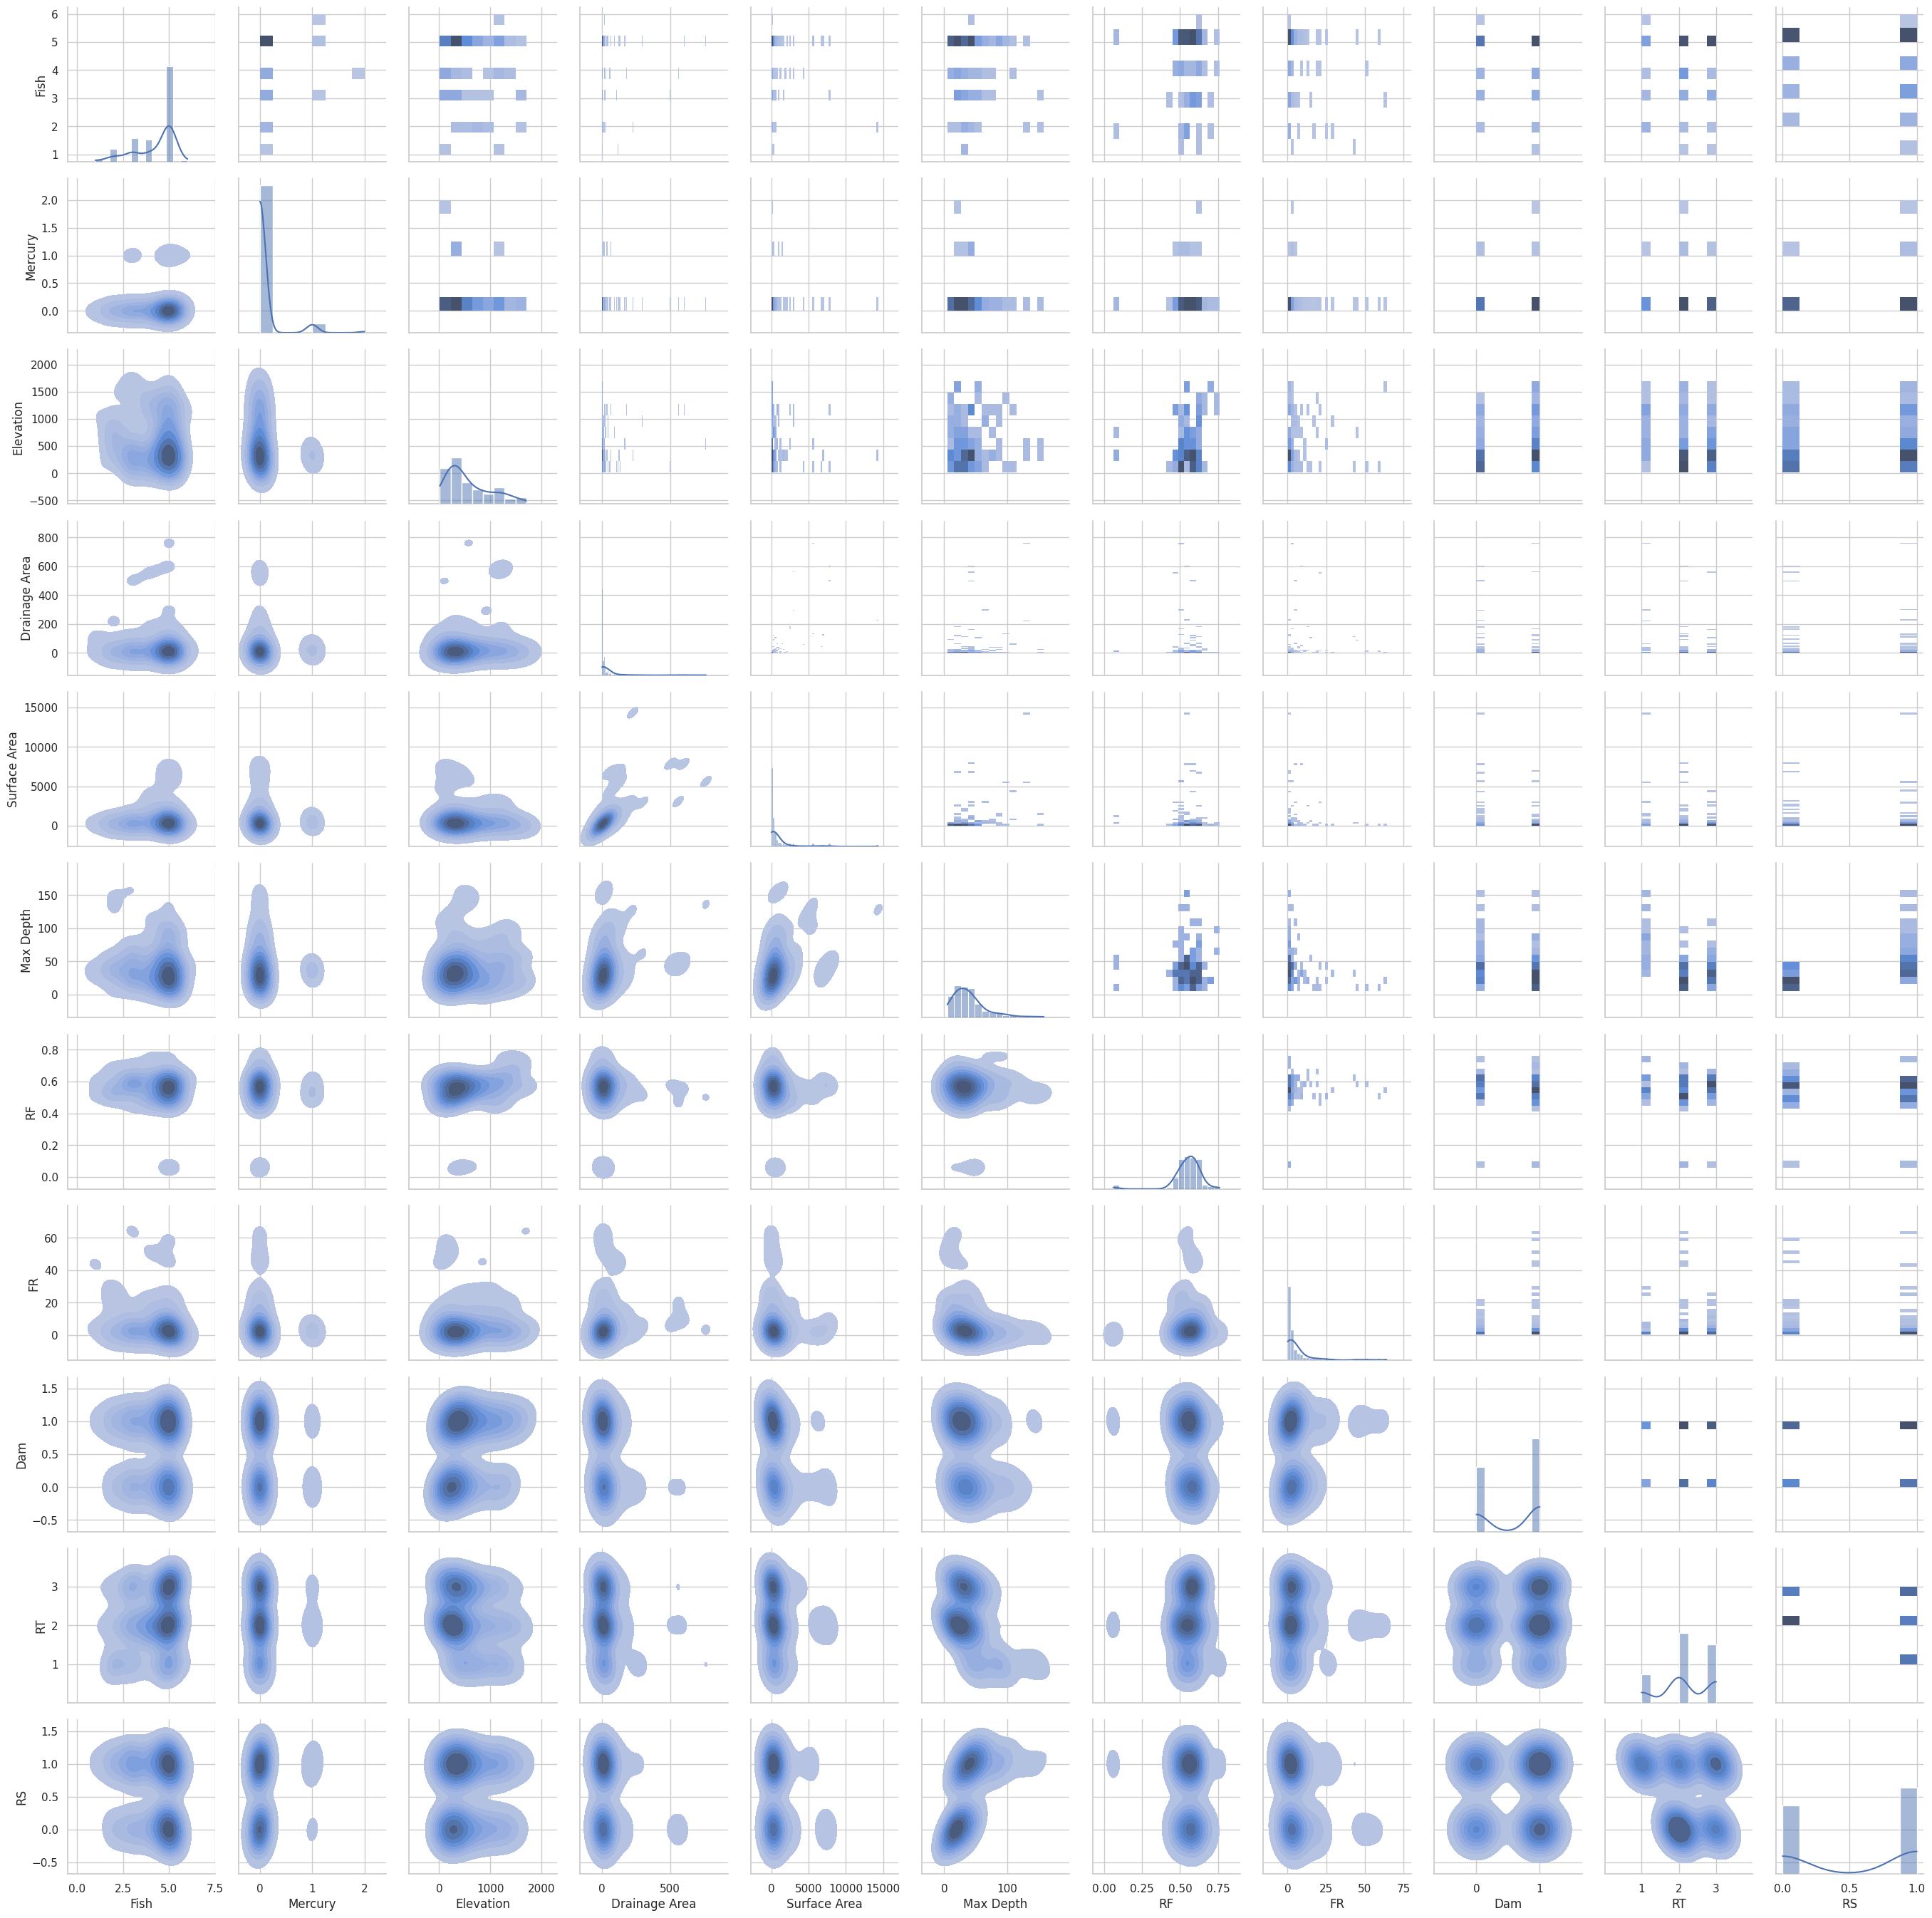

In [6]:
g = sns.PairGrid(fdf)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

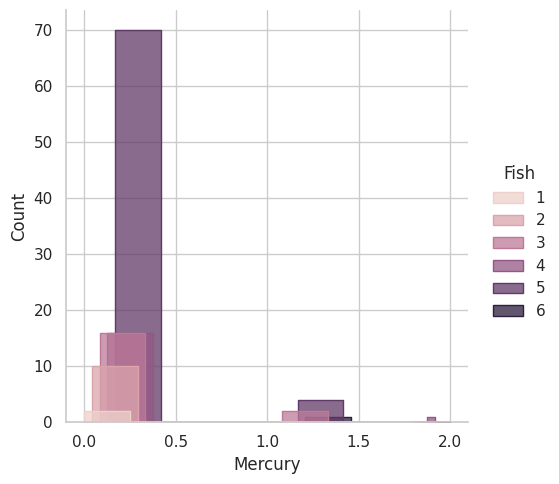

In [7]:
sns.displot(fdf,  x="Mercury", hue="Fish", element="step",multiple="dodge")

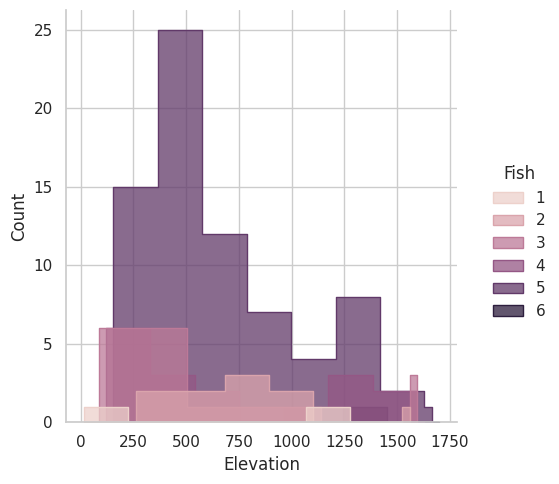

In [8]:
sns.displot(fdf,  x="Elevation", hue="Fish", element="step",multiple="dodge")

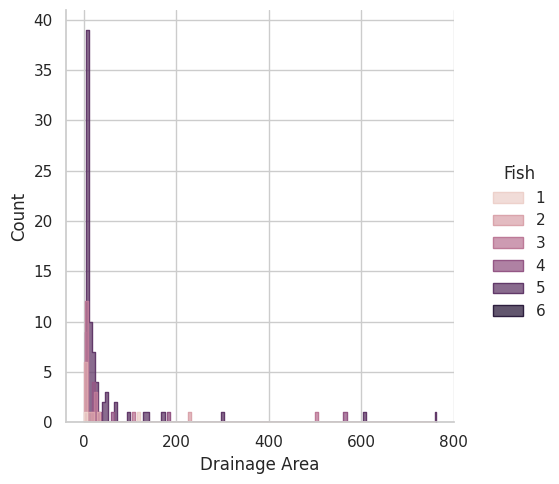

In [9]:
sns.displot(fdf,  x="Drainage Area", hue="Fish", element="step",multiple="dodge")

/tmp/ipykernel_4607/2755821231.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(fdf, x="Drainage Area", hue="Fish", kind="kde", multiple="stack")


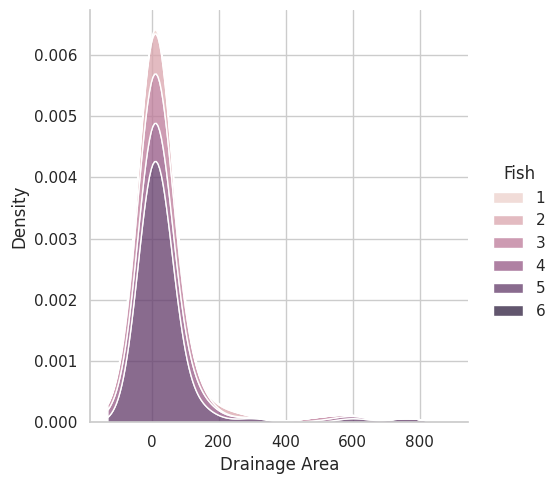

In [10]:
sns.displot(fdf, x="Drainage Area", hue="Fish", kind="kde", multiple="stack")

/tmp/ipykernel_4607/1280457953.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(fdf, x="Mercury", y="Drainage Area", hue="Fish", kind="kde")
/tmp/ipykernel_4607/1280457953.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(fdf, x="Mercury", y="Drainage Area", hue="Fish", kind="kde")
/tmp/ipykernel_4607/1280457953.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(fdf, x="Mercury", y="Drainage Area", hue="Fish", kind="kde")


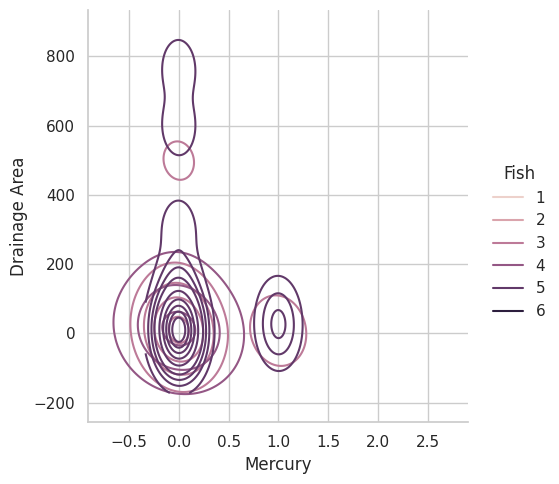

In [11]:
sns.displot(fdf, x="Mercury", y="Drainage Area", hue="Fish", kind="kde")

/tmp/ipykernel_4607/363624370.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(fdf, x="Mercury", y= "Elevation" ,hue="Fish", kind="kde")
/tmp/ipykernel_4607/363624370.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(fdf, x="Mercury", y= "Elevation" ,hue="Fish", kind="kde")
/tmp/ipykernel_4607/363624370.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(fdf, x="Mercury", y= "Elevation" ,hue="Fish", kind="kde")


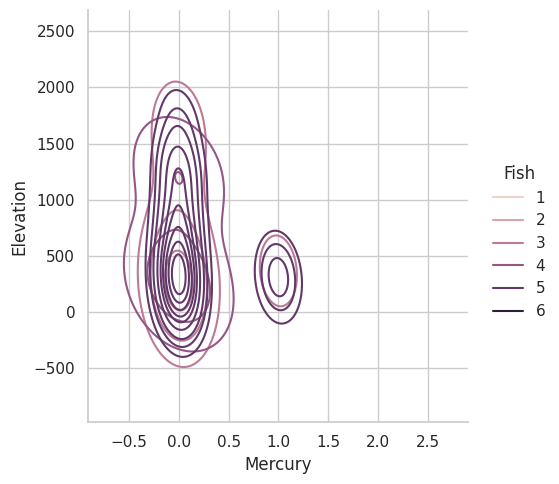

In [12]:
sns.displot(fdf, x="Mercury", y= "Elevation" ,hue="Fish", kind="kde")

/tmp/ipykernel_4607/2257633853.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(fdf, x="FR", hue="Fish", kind="kde", multiple="stack")


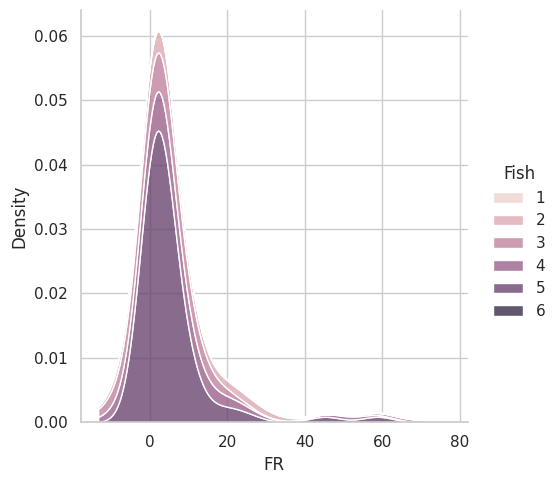

In [13]:
sns.displot(fdf, x="FR", hue="Fish", kind="kde", multiple="stack")

In [14]:
df.head()

,Reservoir,Unnamed: 1,Unnamed: 2,LATITUDE_DEGREES,LATITUDE_MINUTES,LATITUDE_SECONDS,LONGITUDE_DEGREES,LONGITUDE_MINUTES,LONGITUDE_SECONDS
0,Abilene,NaN,NaN,44,57,44,68,5.0,7.0
1,Abraham Lake,NaN,NaN,45,37,50,69,12.0,30.0
2,Academy,NaN,NaN,44,25,13,70,19.0,22.0
3,Acadia,NaN,NaN,43,37,0,70,59.0,4.0
4,Acadia Valley,NaN,NaN,45,30,32,67,50.0,2.0


In [15]:
df.columns
df['y']=1

In [16]:
df.columns

Index(['Reservoir', 'Unnamed: 1', 'Unnamed: 2', 'LATITUDE_DEGREES',
       'LATITUDE_MINUTES', 'LATITUDE_SECONDS', 'LONGITUDE_DEGREES',
       'LONGITUDE_MINUTES', 'LONGITUDE_SECONDS', 'y'],
      dtype='object')

In [17]:
df['LATITUDE_DEGREES'] = pd.to_numeric(df['LATITUDE_DEGREES'], errors='coerce').fillna(0).astype(int)
df['LATITUDE_MINUTES'] = pd.to_numeric(df['LATITUDE_MINUTES'], errors='coerce').fillna(0).astype(int)

df['LATITUDE_SECONDS'] = pd.to_numeric(df['LATITUDE_SECONDS'], errors='coerce').fillna(0).astype(int)

df['LONGITUDE_DEGREES'] = pd.to_numeric(df['LONGITUDE_DEGREES'], errors='coerce').fillna(0).astype(int)
df['LONGITUDE_MINUTES'] = pd.to_numeric(df['LONGITUDE_MINUTES'], errors='coerce').fillna(0).astype(int)
df['LONGITUDE_SECONDS'] = pd.to_numeric(df['LONGITUDE_SECONDS'], errors='coerce').fillna(0).astype(int)

In [18]:
len(df.index)

122

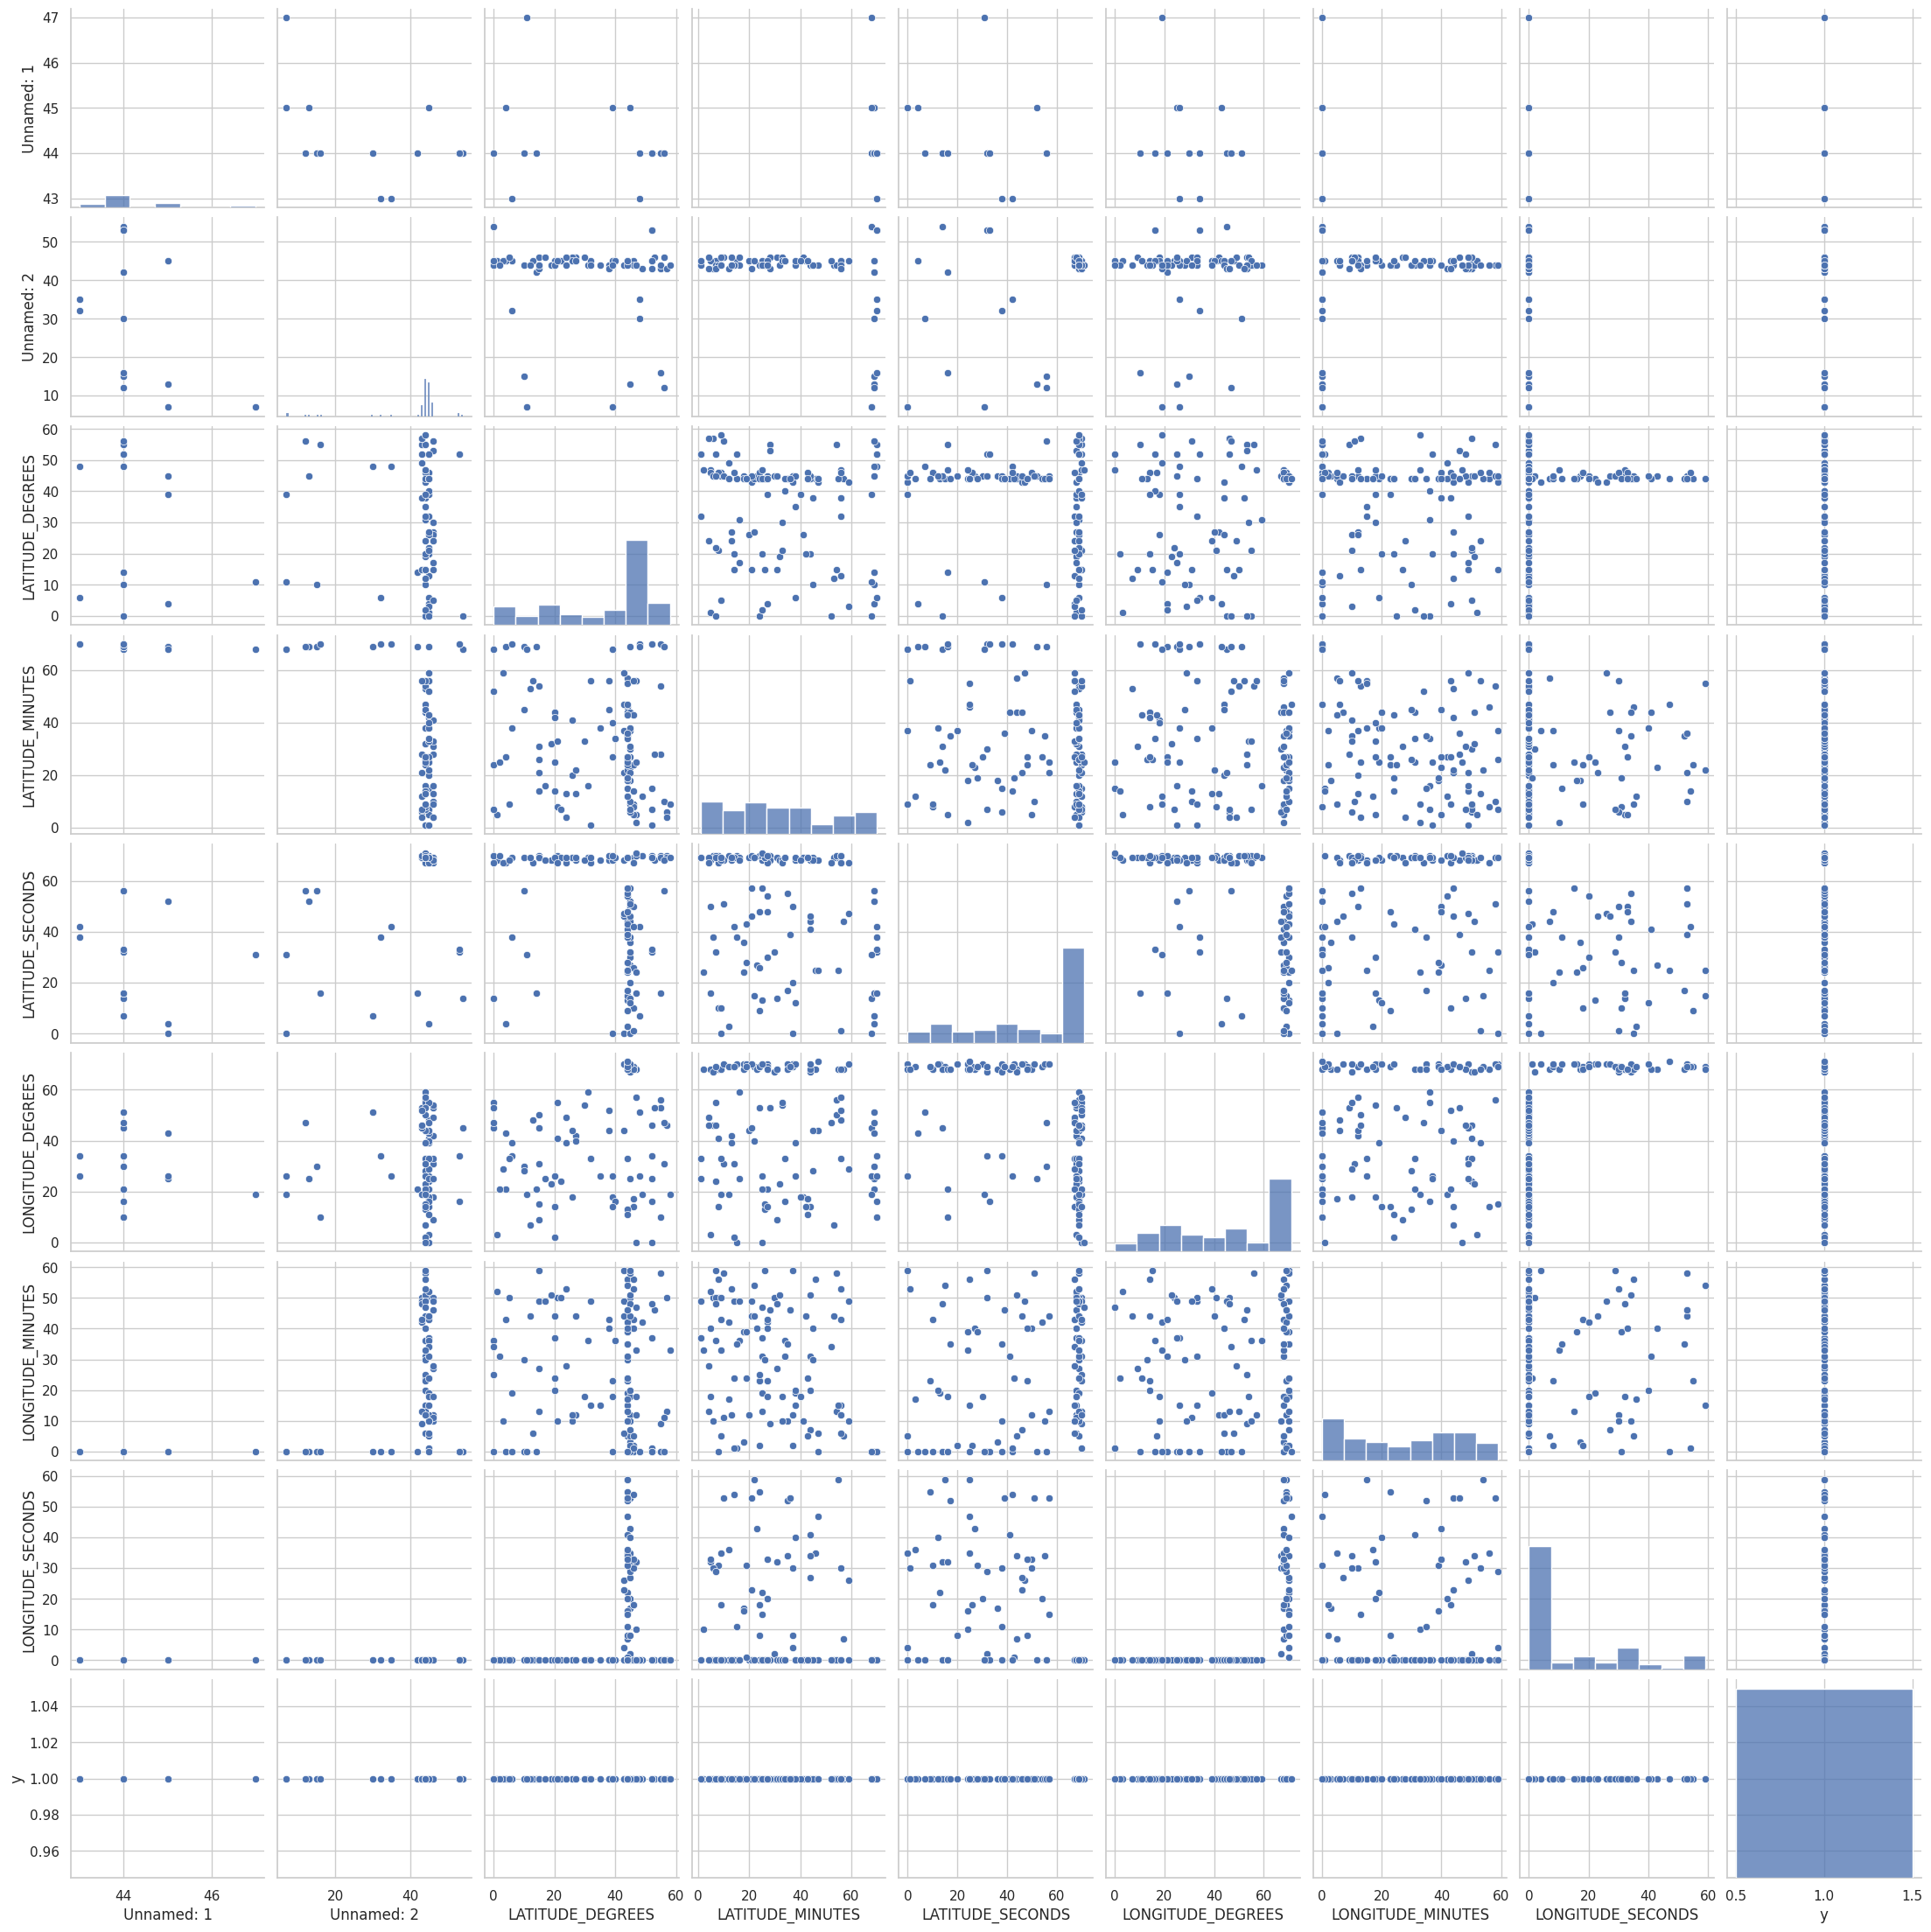

In [19]:
sns.pairplot(df)

/home/bibek/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/bibek/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/bibek/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/bibek/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/bibek/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be 

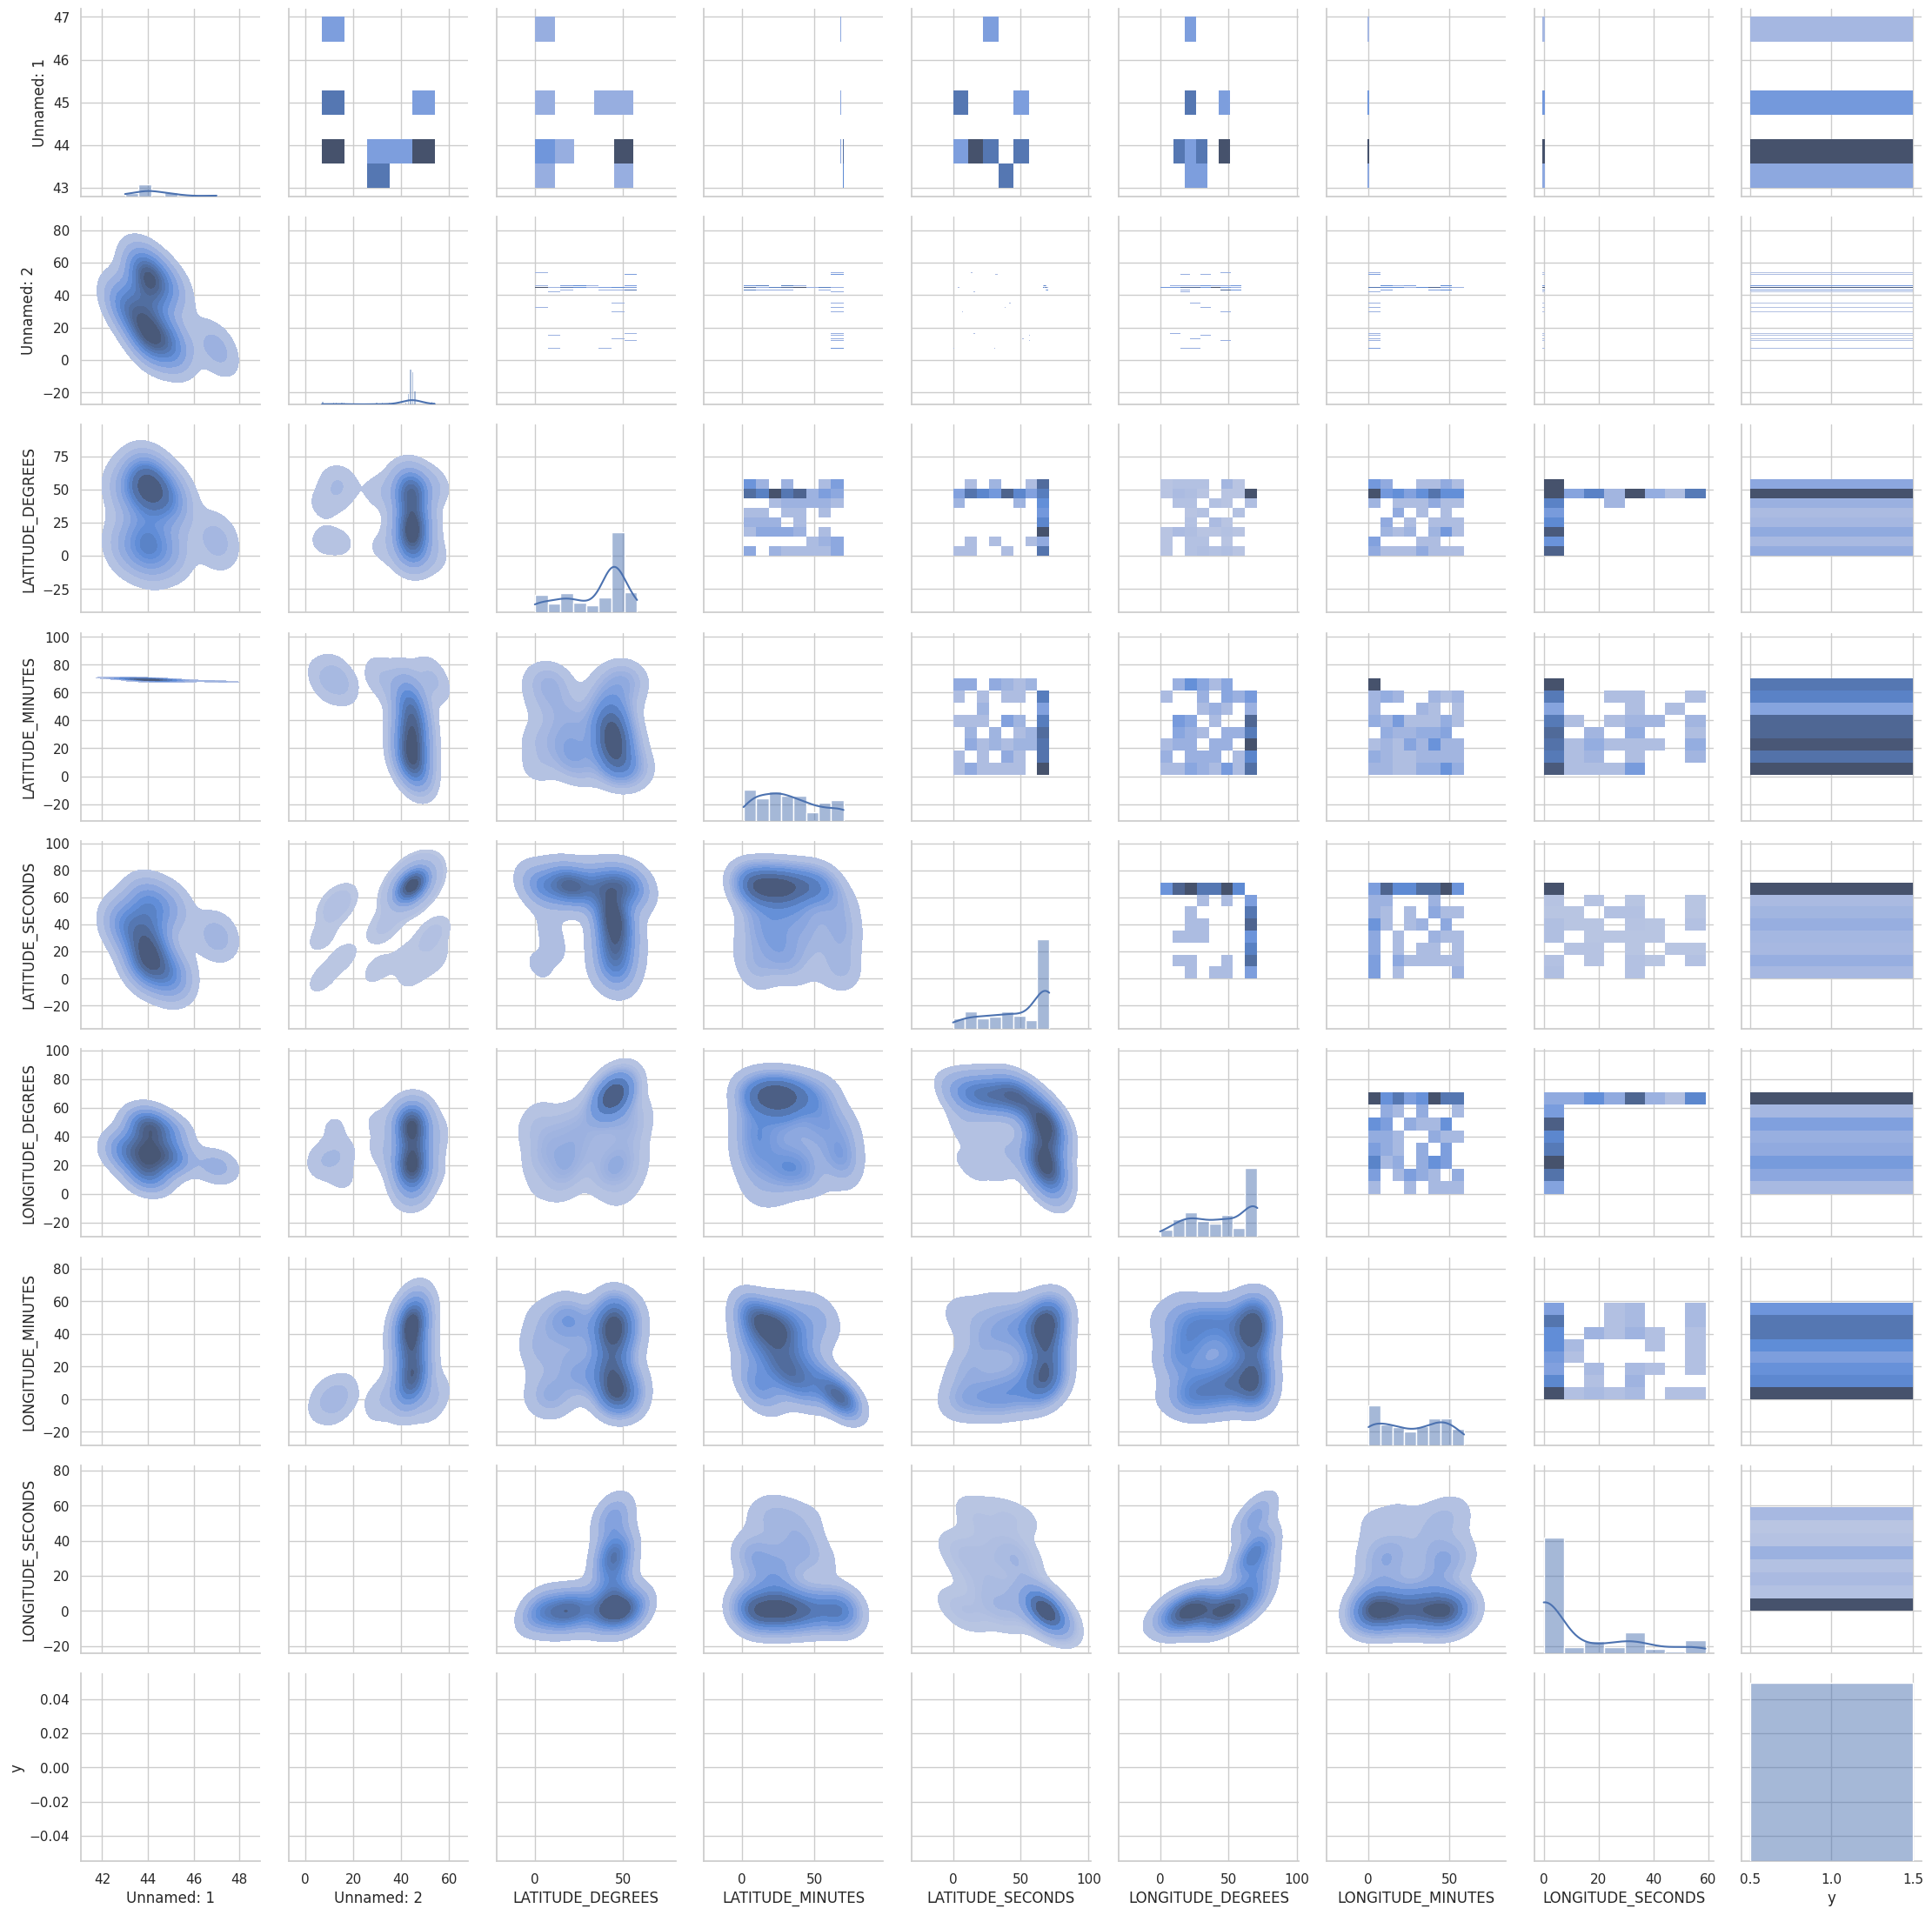

In [20]:
g = sns.PairGrid(df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

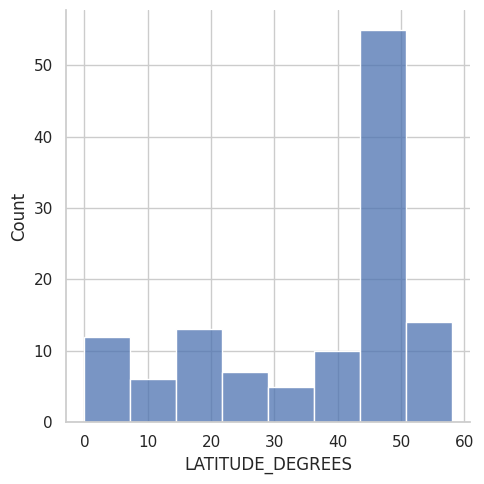

In [21]:
sns.displot(df, x="LATITUDE_DEGREES")

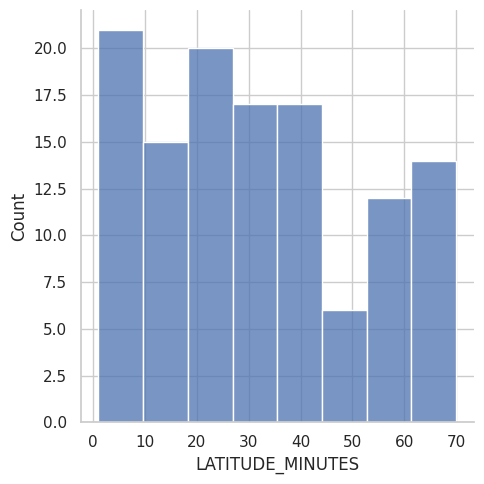

In [22]:
sns.displot(df, x="LATITUDE_MINUTES")

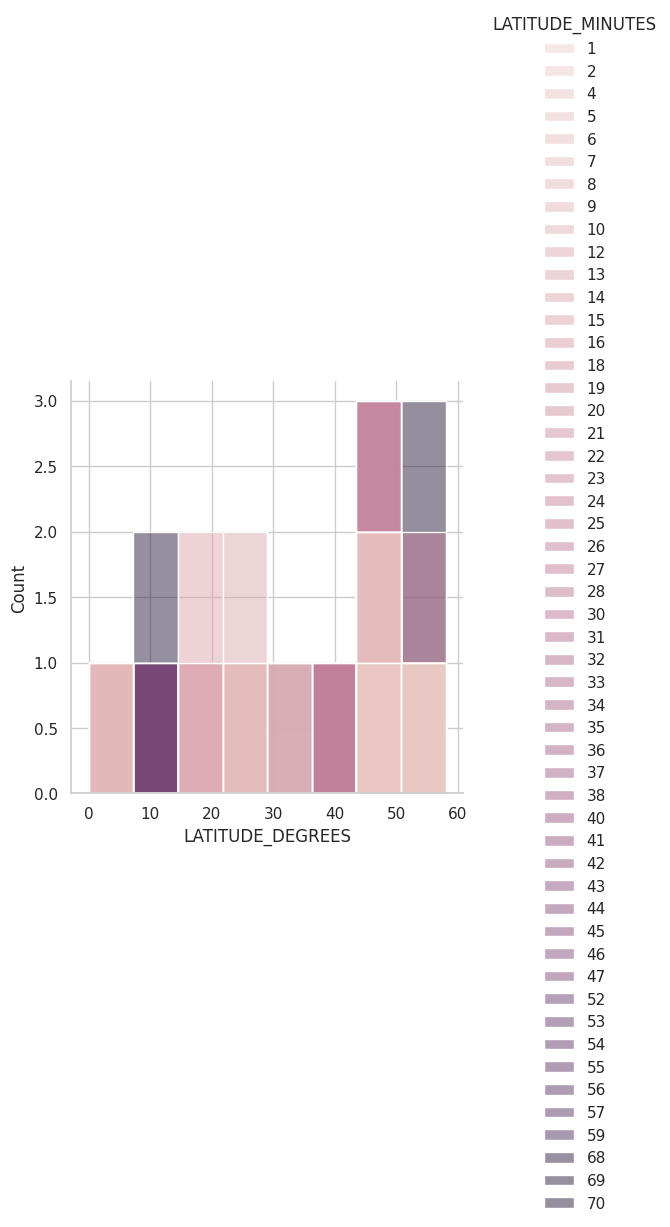

In [23]:
sns.displot(df, x="LATITUDE_DEGREES", hue="LATITUDE_MINUTES")

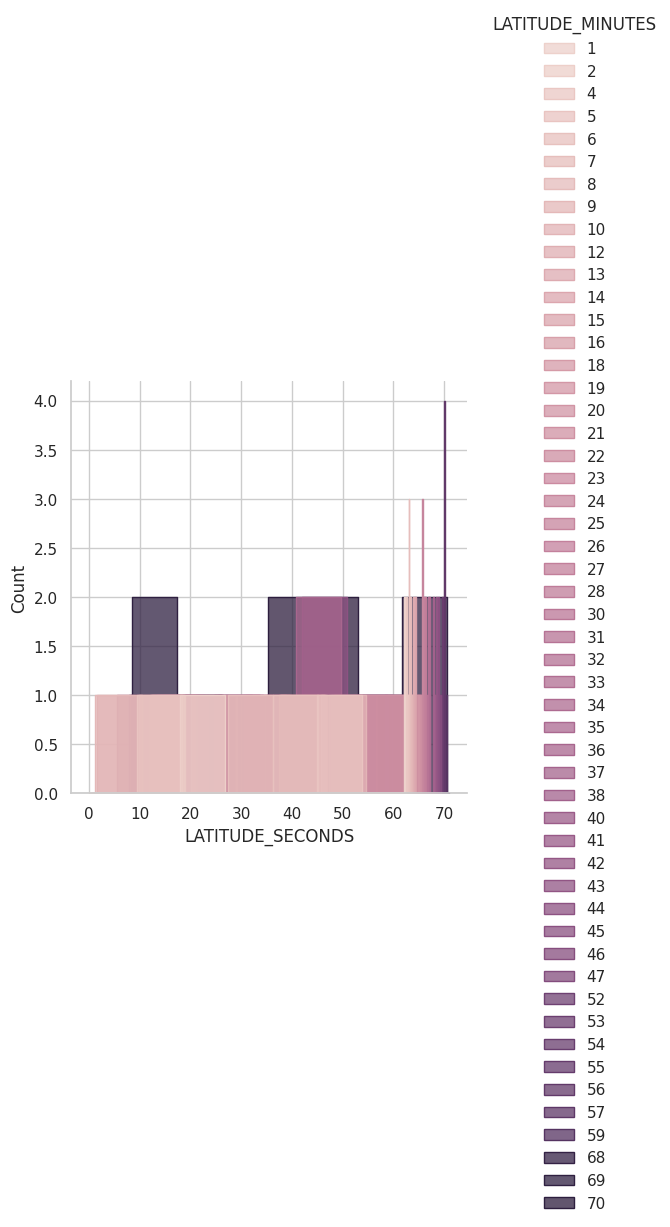

In [24]:
sns.displot(df,  x="LATITUDE_SECONDS", hue="LATITUDE_MINUTES", element="step",multiple="dodge")



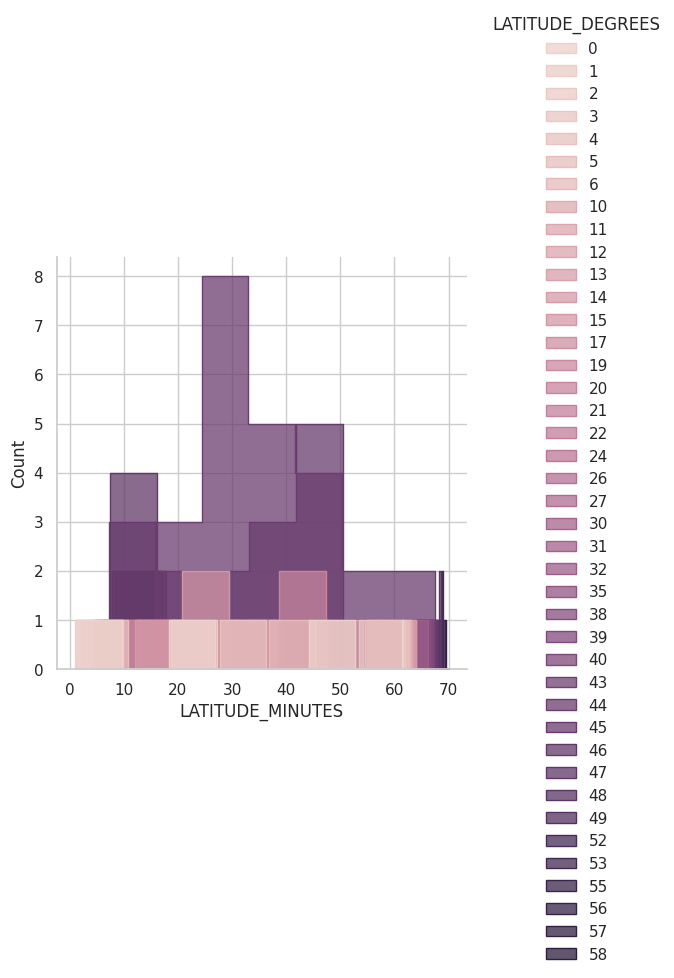

In [25]:
sns.displot(df,  x="LATITUDE_MINUTES", hue="LATITUDE_DEGREES", element="step",multiple="dodge")

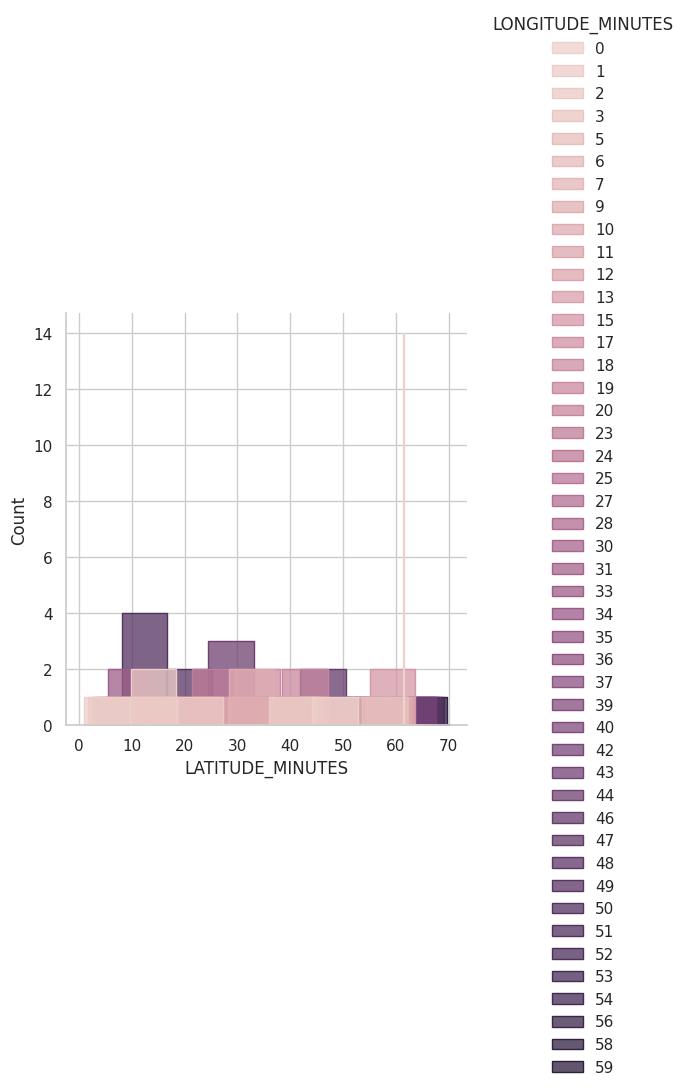

In [26]:
sns.displot(df,  x="LATITUDE_MINUTES", hue="LONGITUDE_MINUTES", element="step",multiple="dodge")


/tmp/ipykernel_4607/2811234912.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x="LATITUDE_DEGREES", hue="LONGITUDE_MINUTES", kind="kde", multiple="stack")
/tmp/ipykernel_4607/2811234912.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x="LATITUDE_DEGREES", hue="LONGITUDE_MINUTES", kind="kde", multiple="stack")
/tmp/ipykernel_4607/2811234912.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x="LATITUDE_DEGREES", hue="LONGITUDE_MINUTES", kind="kde", multiple="stack")
/tmp/ipykernel_4607/2811234912.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x="LATITUDE_DEGREES", hue="LONGITUDE_MINUTES", kind="kde", multiple="stack")
/tmp/ipy

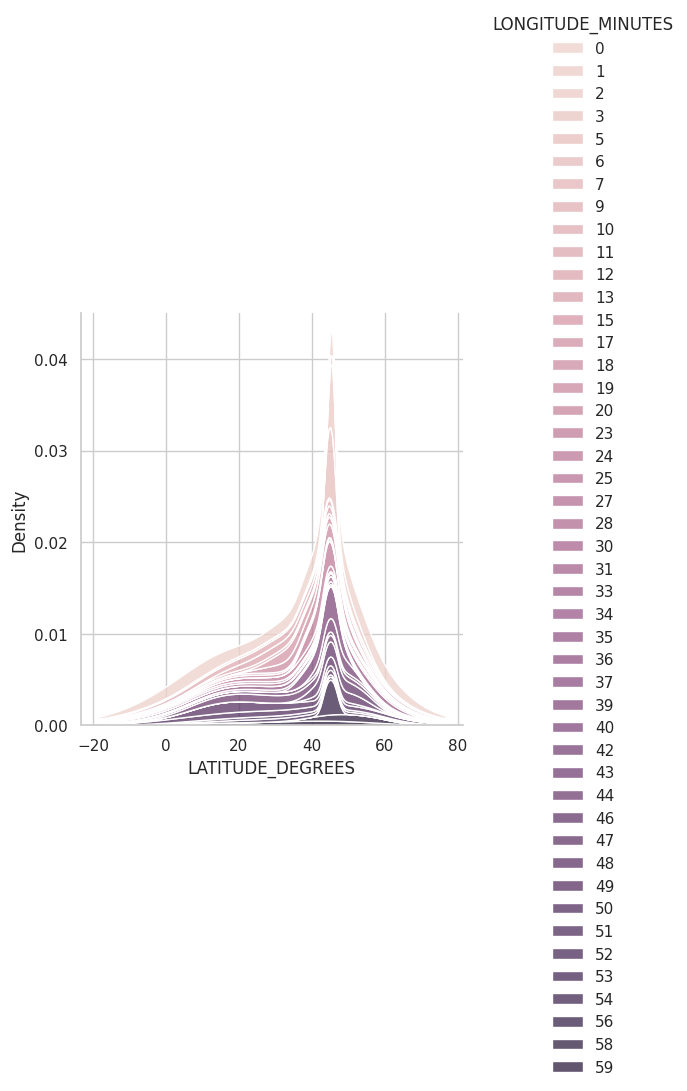

In [27]:
sns.displot(df, x="LATITUDE_DEGREES", hue="LONGITUDE_MINUTES", kind="kde", multiple="stack")

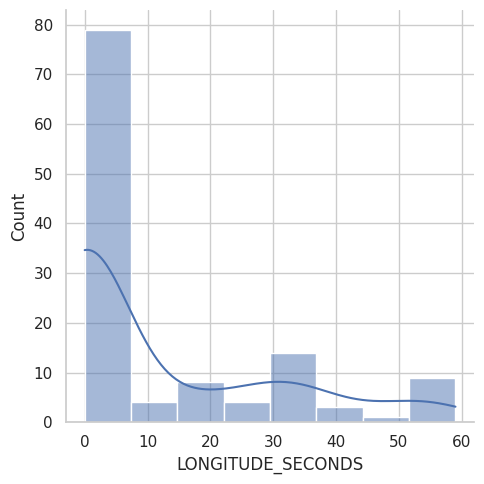

In [28]:
sns.displot(df, x="LONGITUDE_SECONDS", kde=True)

/tmp/ipykernel_4607/44529058.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x="LONGITUDE_DEGREES", y="LONGITUDE_SECONDS", hue="LONGITUDE_MINUTES", kind="kde")
/tmp/ipykernel_4607/44529058.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x="LONGITUDE_DEGREES", y="LONGITUDE_SECONDS", hue="LONGITUDE_MINUTES", kind="kde")
/tmp/ipykernel_4607/44529058.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x="LONGITUDE_DEGREES", y="LONGITUDE_SECONDS", hue="LONGITUDE_MINUTES", kind="kde")
/tmp/ipykernel_4607/44529058.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x="LONGITUDE_DEGREES", y="LONGITUDE_SEC

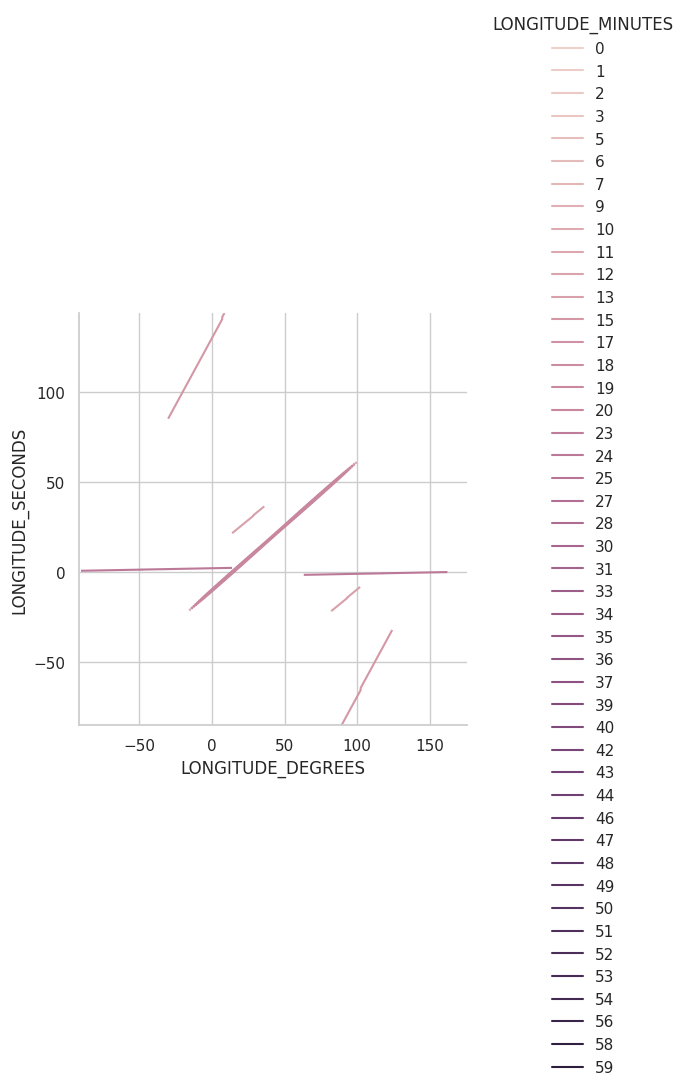

In [29]:
sns.displot(df, x="LONGITUDE_DEGREES", y="LONGITUDE_SECONDS", hue="LONGITUDE_MINUTES", kind="kde")

In [40]:
df = fdf.merge(df,on='Reservoir')
df.columns

Index(['Reservoir', 'Fish_x', 'Mercury_x', 'Elevation_x', 'Drainage Area_x',
       'Surface Area_x', 'Max Depth_x', 'RF_x', 'FR_x', 'Dam_x', 'RT_x',
       'RS_x', 'Fish_y', 'Mercury_y', 'Elevation_y', 'Drainage Area_y',
       'Surface Area_y', 'Max Depth_y', 'RF_y', 'FR_y', 'Dam_y', 'RT_y',
       'RS_y', 'Unnamed: 1', 'Unnamed: 2', 'LATITUDE_DEGREES',
       'LATITUDE_MINUTES', 'LATITUDE_SECONDS', 'LONGITUDE_DEGREES',
       'LONGITUDE_MINUTES', 'LONGITUDE_SECONDS', 'y'],
      dtype='object')

In [42]:
df = df[['Reservoir', 'Fish_x', 'Mercury_x', 'Elevation_x', 'Drainage Area_x',
       'Surface Area_x', 'Max Depth_x', 'RF_x', 'FR_x', 'Dam_x', 'RT_x',
       'RS_x', 'Fish_y', 'Mercury_y', 'Elevation_y', 'Drainage Area_y',
       'Surface Area_y', 'Max Depth_y', 'RF_y', 'FR_y', 'Dam_y', 'RT_y',
       'RS_y', 'Unnamed: 1', 'Unnamed: 2', 'LATITUDE_DEGREES',
       'LATITUDE_MINUTES', 'LATITUDE_SECONDS', 'LONGITUDE_DEGREES',
       'LONGITUDE_MINUTES', 'LONGITUDE_SECONDS', 'y']].replace(np.nan, 0)

In [44]:
'''df['Fish'] = pd.to_numeric(df['Fish'], errors='coerce').fillna(0).astype(int)
df['Elevation'] = pd.to_numeric(df['Elevation'], errors='coerce').fillna(0).astype(int)

df['Mercury'] = pd.to_numeric(df['Mercury'], errors='coerce').fillna(0).astype(int)

df['Drainage Area'] = pd.to_numeric(df['Drainage Area'], errors='coerce').fillna(0).astype(int)
df['Surface Area'] = pd.to_numeric(df['Surface Area'], errors='coerce').fillna(0).astype(int)
df['Dam'] = pd.to_numeric(df['Dam'], errors='coerce').fillna(0).astype(int)
df['LATITUDE_DEGREES'] = pd.to_numeric(df['LATITUDE_DEGREES'], errors='coerce').fillna(0).astype(int)
df['LATITUDE_MINUTES'] = pd.to_numeric(df['LATITUDE_MINUTES'], errors='coerce').fillna(0).astype(int)

df['LATITUDE_SECONDS'] = pd.to_numeric(df['LATITUDE_SECONDS'], errors='coerce').fillna(0).astype(int)

df['LONGITUDE_DEGREES'] = pd.to_numeric(df['LONGITUDE_DEGREES'], errors='coerce').fillna(0).astype(int)
df['LONGITUDE_MINUTES'] = pd.to_numeric(df['LONGITUDE_MINUTES'], errors='coerce').fillna(0).astype(int)
df['LONGITUDE_SECONDS'] = pd.to_numeric(df['LONGITUDE_SECONDS'], errors='coerce').fillna(0).astype(int)'''

"df['Fish'] = pd.to_numeric(df['Fish'], errors='coerce').fillna(0).astype(int)\ndf['Elevation'] = pd.to_numeric(df['Elevation'], errors='coerce').fillna(0).astype(int)\n\ndf['Mercury'] = pd.to_numeric(df['Mercury'], errors='coerce').fillna(0).astype(int)\n\ndf['Drainage Area'] = pd.to_numeric(df['Drainage Area'], errors='coerce').fillna(0).astype(int)\ndf['Surface Area'] = pd.to_numeric(df['Surface Area'], errors='coerce').fillna(0).astype(int)\ndf['Dam'] = pd.to_numeric(df['Dam'], errors='coerce').fillna(0).astype(int)\ndf['LATITUDE_DEGREES'] = pd.to_numeric(df['LATITUDE_DEGREES'], errors='coerce').fillna(0).astype(int)\ndf['LATITUDE_MINUTES'] = pd.to_numeric(df['LATITUDE_MINUTES'], errors='coerce').fillna(0).astype(int)\n\ndf['LATITUDE_SECONDS'] = pd.to_numeric(df['LATITUDE_SECONDS'], errors='coerce').fillna(0).astype(int)\n\ndf['LONGITUDE_DEGREES'] = pd.to_numeric(df['LONGITUDE_DEGREES'], errors='coerce').fillna(0).astype(int)\ndf['LONGITUDE_MINUTES'] = pd.to_numeric(df['LONGITUDE_M

In [46]:
x = df.drop(["y","Reservoir"], axis='columns')
y = df[['Mercury_x']]



In [53]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [54]:

transformer.fit(x)


PolynomialFeatures(include_bias=False)

In [55]:
x_ = transformer.transform(x)

In [56]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [57]:
x_

array([[   3.,    0.,  196., ...,   25.,   35.,   49.],
       [   4.,    0.,  345., ...,  144.,  360.,  900.],
       [   5.,    0.,  487., ...,  361.,  418.,  484.],
       ...,
       [   3.,    0., 1503., ...,  400.,  800., 1600.],
       [   5.,    0., 1700., ..., 2116., 2438., 2809.],
       [   5.,    0.,  846., ...,    0.,    0., 2209.]])

In [58]:
model = LinearRegression().fit(x_, y)

In [59]:
r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")
intercept: 21.372321428571436

print(f"coefficients: {model.coef_}")
coefficients: [-1.32357143, 0.02839286]

coefficient of determination: 1.0
intercept: [0.26851145]
coefficients: [[-1.77074435e-05  3.52831186e-05 -2.71240382e-04  9.31350285e-06
  -4.97777401e-04  1.54821838e-04 -4.19105248e-06 -4.52101341e-06
   1.58487121e-06 -7.87892093e-06  4.30137175e-06 -1.77074430e-05
   3.52831187e-05 -2.71240382e-04  9.31350285e-06 -4.97777401e-04
   1.54821838e-04 -4.19105248e-06 -4.52101341e-06  1.58487121e-06
  -7.87892093e-06  4.30137175e-06  3.40748043e-06 -3.98862479e-05
   3.20466132e-05  5.92000781e-05 -1.22283556e-04  1.35649027e-04
   5.59680162e-06 -8.31893787e-06 -2.22000900e-04  1.16280548e-04
   1.11282087e-05 -1.38918253e-04  3.42604587e-05 -2.73989766e-04
  -2.15518824e-05  9.15019344e-05 -1.29244434e-05 -4.56387791e-05
  -2.66536174e-05 -2.22000900e-04  1.16280548e-04  1.11282087e-05
  -1.38918253e-04  3.42604587e-05 -2.73989766e-04 -2.15518824e-05
   9.15019344e-05 -1.29244434e-05 -4.56387791e-05 -2.66536174e-05
  -4.64572610e-05 -2.91090798e-04 -3.49497673e-04 -2.09473079e-04
   3

In [60]:
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)

In [61]:
x_

array([[1.000e+00, 3.000e+00, 0.000e+00, ..., 2.500e+01, 3.500e+01,
        4.900e+01],
       [1.000e+00, 4.000e+00, 0.000e+00, ..., 1.440e+02, 3.600e+02,
        9.000e+02],
       [1.000e+00, 5.000e+00, 0.000e+00, ..., 3.610e+02, 4.180e+02,
        4.840e+02],
       ...,
       [1.000e+00, 3.000e+00, 0.000e+00, ..., 4.000e+02, 8.000e+02,
        1.600e+03],
       [1.000e+00, 5.000e+00, 0.000e+00, ..., 2.116e+03, 2.438e+03,
        2.809e+03],
       [1.000e+00, 5.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.209e+03]])

In [62]:
model = LinearRegression(fit_intercept=False).fit(x_, y)

In [63]:
r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")



coefficient of determination: 1.0
intercept: 0.0
coefficients: [[ 1.63715214e-06 -1.20896685e-05  3.57227128e-05 -2.17158537e-04
   6.10154244e-06 -3.41215981e-04  1.56805103e-04 -3.23654144e-06
   9.01059688e-08  2.09085131e-06 -5.98765220e-06  4.26521141e-06
  -1.20896684e-05  3.57227127e-05 -2.17158537e-04  6.10154244e-06
  -3.41215981e-04  1.56805103e-04 -3.23654144e-06  9.01059683e-08
   2.09085131e-06 -5.98765220e-06  4.26521141e-06  1.49008686e-06
  -2.06105407e-05  6.96305762e-05  6.91297171e-05 -6.00827334e-05
   1.79406111e-04  3.99427708e-05 -7.00195738e-06 -1.92693029e-04
   1.19806784e-04  6.07807742e-06 -1.22975315e-04  2.88849051e-05
  -2.71019911e-04 -1.76274464e-05  9.51058865e-05 -1.84358494e-05
  -5.68618755e-05 -2.19307183e-05 -1.92693029e-04  1.19806784e-04
   6.07807742e-06 -1.22975315e-04  2.88849051e-05 -2.71019911e-04
  -1.76274464e-05  9.51058865e-05 -1.84358494e-05 -5.68618755e-05
  -2.19307183e-05 -5.80133654e-05 -2.36263734e-04 -3.01129666e-04
  -1.42975135

In [64]:
y_pred = model.predict(x_)
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 2.28245201e-12]
 [ 3.32844863e-13]
 [-3.45032336e-12]
 [-7.52131690e-12]
 [ 4.01323419e-12]
 [-3.05980241e-12]
 [-4.68325378e-12]
 [-5.39790435e-12]
 [-7.16386950e-11]
 [-1.75068293e-12]
 [-7.38498152e-12]
 [-1.27537980e-11]
 [ 5.85842486e-12]
 [ 5.01060304e-12]
 [ 3.67242348e-12]
 [-5.67368375e-12]
 [ 1.91668903e-12]
 [-2.21578311e-12]
 [ 2.97706304e-12]
 [-6.65245636e-13]
 [-3.39017703e-12]
 [-2.82834867e-12]
 [ 1.00000000e+00]
 [-3.98547861e-12]
 [ 2.09343654e-12]
 [-8.13737966e-13]
 [ 3.04556380e-12]
 [-3.47979978e-12]
 [ 2.12097007e-12]
 [-7.18369808e-13]
 [-2.28769781e-12]
 [-1.77274861e-12]
 [ 1.86600735e-13]
 [-7.40657535e-13]
 [ 2.13284945e-12]
 [ 3.85685928e-12]
 [ 1.52232393e-13]
 [ 2.53308485e-12]
 [-4.18598489e-12]
 [-3.48965301e-12]
 [-5.80135939e-12]
 [-5.61772850e-14]
 [ 7.00384195e-13]
 [ 1.18288712e-12]
 [-4.60625982e-12]
 [-1.57562852e-12]
 [-2.87569968e-12]
 [ 4.04579148e-12]
 [ 4.39284720e-12]
 [-2.25537644e-12]
 [ 2.65425182e-12]
 [-1.774358